In [1]:
import pandas as pd
import pyrsm as rsm
import numpy as np

In [2]:
df = pd.read_csv('Data/Pilot+Group+5_February+28%2C+2024_12.51.csv')

In [3]:
df.head()

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Q12.1,Q13.1,Q14.1,Q15.1,Q1.1,Q2.2,Q3.2,Q5.2,Q4.1,SC0
0,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,...,"Between 1 and 90, how many integers n, when ra...",A three-digit number is such that the sum of t...,Two sets of 4 consecutive positive integers ha...,N and P are integers greater than 1. 5n is the...,What is your year in college?,What is your major?,What is your gender?,Do you prefer to be graded on an absolute scal...,Please enter your email address so we can send...,Score
1,"{""ImportId"":""startDate"",""timeZone"":""America/Lo...","{""ImportId"":""endDate"",""timeZone"":""America/Los_...","{""ImportId"":""status""}","{""ImportId"":""ipAddress""}","{""ImportId"":""progress""}","{""ImportId"":""duration""}","{""ImportId"":""finished""}","{""ImportId"":""recordedDate"",""timeZone"":""America...","{""ImportId"":""_recordId""}","{""ImportId"":""recipientLastName""}",...,"{""ImportId"":""QID39""}","{""ImportId"":""QID40""}","{""ImportId"":""QID41""}","{""ImportId"":""QID42""}","{""ImportId"":""QID13""}","{""ImportId"":""QID12_TEXT""}","{""ImportId"":""QID18""}","{""ImportId"":""QID26""}","{""ImportId"":""QID15_TEXT""}","{""ImportId"":""SC_dngT4ZC60YB1s8K""}"
2,2024-02-26 10:16:12,2024-02-26 10:18:18,IP Address,69.196.32.230,100,126,True,2024-02-26 10:18:19,R_7kFz0cSedaI5w1Y,NaN,...,NaN,NaN,NaN,NaN,Junior,business econ,Female,Relative scale,dkarandinos@ucsd.edu,1
3,2024-02-26 10:17:05,2024-02-26 10:18:30,IP Address,128.54.35.218,100,85,True,2024-02-26 10:18:30,R_5HC7oI7UEG7FrIa,NaN,...,NaN,NaN,NaN,NaN,Junior,BUS ECON,Male,Relative scale,shw138@ucsd.edu,2
4,2024-02-26 10:14:38,2024-02-26 10:19:52,IP Address,69.196.45.69,100,313,True,2024-02-26 10:19:53,R_1e38qMEicLRcDQt,NaN,...,12,891,4,14,Senior,business econ and international business,Male,Relative scale,rywu@ucsd.edu,4


In [4]:
df.columns

Index(['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
       'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
       'RecipientLastName', 'RecipientFirstName', 'RecipientEmail',
       'ExternalReference', 'LocationLatitude', 'LocationLongitude',
       'DistributionChannel', 'UserLanguage', 'Intro', 'Q1', 'Q2', 'Q3', 'Q4 ',
       'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15',
       'Intro.1', 'Q1 ', 'Q2.1', 'Q3.1', 'Q4', 'Q5.1', 'Q6.1', 'Q7.1', 'Q8.1',
       'Q9.1', 'Q10.1', 'Q11.1', 'Q12.1', 'Q13.1', 'Q14.1', 'Q15.1', 'Q1.1',
       'Q2.2', 'Q3.2', 'Q5.2', 'Q4.1', 'SC0'],
      dtype='object')

In [5]:
# Selecting specific columns to create a new DataFrame
columns_to_keep = ['Duration (in seconds)', 'Finished', 'Q1', 'Q2.1','Q1.1', 'Q2.2', 'Q3.2', 'Q5.2', 'Q4.1', 'SC0']

# Creating the new DataFrame with just the desired columns
df_filtered = df[columns_to_keep]

# Deleting the first 2 rows using slicing
df_filtered = df_filtered.iloc[2:].reset_index(drop=True)

# Replacing NaN entries in the 'Intro' column with 'NA'
df['Intro'] = df['Intro'].fillna('NA')

# Display the first 10 rows to verify
df_filtered.head(10)


,Duration (in seconds),Finished,Q1,Q2.1,Q1.1,Q2.2,Q3.2,Q5.2,Q4.1,SC0
0,126,True,The relationship cannot be determined from the...,NaN,Junior,business econ,Female,Relative scale,dkarandinos@ucsd.edu,1
1,85,True,The relationship cannot be determined from the...,NaN,Junior,BUS ECON,Male,Relative scale,shw138@ucsd.edu,2
2,313,True,NaN,The relationship cannot be determined from the...,Senior,business econ and international business,Male,Relative scale,rywu@ucsd.edu,4
3,469,True,Quantity B is greater,NaN,Junior,Economics,Male,Absolute scale,yuw112@ucsd.edu,7
4,97,True,NaN,Quantity B is greater,Senior,Business Economics,Male,Absolute scale,glozanop@ucsd.edu,3
5,486,True,The relationship cannot be determined from the...,NaN,Sophomore,Business economics,Female,Relative scale,cic005@ucsd.edu,6
6,189,True,NaN,The relationship cannot be determined from the...,Senior,Business Economics,Male,Relative scale,yux038@ucsd.edu,2
7,411,True,NaN,Both quantities are equal,Junior,Business Economics,Male,Relative scale,kdelgadillo@ucsd.edu,4
8,263,True,NaN,The relationship cannot be determined from the...,Junior,Business Econ,Male,Relative scale,b2hill@ucsd.edu,2
9,520,True,The relationship cannot be determined from the...,NaN,Junior,Bus econ,Female,Relative scale,sep022@ucsd.edu,4


In [6]:
df_filtered = df_filtered.rename(columns={
    'Q1': 'Relative_Test',
    'Q2.1': 'Absolute_Test',
    'Q1.1': 'Year',
    'Q2.2': 'Major',
    'Q3.2': 'Gender',
    'Q5.2': 'Preferred_Scale',
    'Q4.1': 'Email',
    'SC0': 'Score'
})

df_filtered = df_filtered.iloc[2:]

df_filtered = df_filtered.reset_index(drop=True)
df_filtered.head()

,Duration (in seconds),Finished,Relative_Test,Absolute_Test,Year,Major,Gender,Preferred_Scale,Email,Score
0,313,True,NaN,The relationship cannot be determined from the...,Senior,business econ and international business,Male,Relative scale,rywu@ucsd.edu,4
1,469,True,Quantity B is greater,NaN,Junior,Economics,Male,Absolute scale,yuw112@ucsd.edu,7
2,97,True,NaN,Quantity B is greater,Senior,Business Economics,Male,Absolute scale,glozanop@ucsd.edu,3
3,486,True,The relationship cannot be determined from the...,NaN,Sophomore,Business economics,Female,Relative scale,cic005@ucsd.edu,6
4,189,True,NaN,The relationship cannot be determined from the...,Senior,Business Economics,Male,Relative scale,yux038@ucsd.edu,2


In [7]:
# Converting 'Duration (in seconds)' to minutes
df_filtered['Duration (in minutes)'] = df_filtered['Duration (in seconds)'].astype(float) / 60
# Dropping the 'Duration (in seconds)' column
df_filtered.drop(columns=['Duration (in seconds)'], inplace=True)


In [8]:
# Reordering columns
columns = ['Duration (in minutes)', 'Finished'] + [col for col in df_filtered.columns if col not in ['Duration (in minutes)', 'Finished']]
df_filtered = df_filtered[columns]
df_filtered.head()


,Duration (in minutes),Finished,Relative_Test,Absolute_Test,Year,Major,Gender,Preferred_Scale,Email,Score
0,5.216667,True,NaN,The relationship cannot be determined from the...,Senior,business econ and international business,Male,Relative scale,rywu@ucsd.edu,4
1,7.816667,True,Quantity B is greater,NaN,Junior,Economics,Male,Absolute scale,yuw112@ucsd.edu,7
2,1.616667,True,NaN,Quantity B is greater,Senior,Business Economics,Male,Absolute scale,glozanop@ucsd.edu,3
3,8.100000,True,The relationship cannot be determined from the...,NaN,Sophomore,Business economics,Female,Relative scale,cic005@ucsd.edu,6
4,3.150000,True,NaN,The relationship cannot be determined from the...,Senior,Business Economics,Male,Relative scale,yux038@ucsd.edu,2


In [9]:
# Removing row requested by TA
if 47 in df_filtered.index:
    df_filtered = df_filtered.drop(index=47)


df_filtered.head()

,Duration (in minutes),Finished,Relative_Test,Absolute_Test,Year,Major,Gender,Preferred_Scale,Email,Score
0,5.216667,True,NaN,The relationship cannot be determined from the...,Senior,business econ and international business,Male,Relative scale,rywu@ucsd.edu,4
1,7.816667,True,Quantity B is greater,NaN,Junior,Economics,Male,Absolute scale,yuw112@ucsd.edu,7
2,1.616667,True,NaN,Quantity B is greater,Senior,Business Economics,Male,Absolute scale,glozanop@ucsd.edu,3
3,8.100000,True,The relationship cannot be determined from the...,NaN,Sophomore,Business economics,Female,Relative scale,cic005@ucsd.edu,6
4,3.150000,True,NaN,The relationship cannot be determined from the...,Senior,Business Economics,Male,Relative scale,yux038@ucsd.edu,2


In [10]:
# Use np.where directly from numpy
df_filtered['Test_Type'] = np.where(df_filtered['Relative_Test'].notna(), 'Relative', 
                                    np.where(df_filtered['Absolute_Test'].notna(), 'Absolute', 'Unknown'))

df_filtered = df_filtered.drop(['Relative_Test', 'Absolute_Test'], axis=1)

# Display the DataFrame to verify the changes
df_filtered.head()


,Duration (in minutes),Finished,Year,Major,Gender,Preferred_Scale,Email,Score,Test_Type
0,5.216667,True,Senior,business econ and international business,Male,Relative scale,rywu@ucsd.edu,4,Absolute
1,7.816667,True,Junior,Economics,Male,Absolute scale,yuw112@ucsd.edu,7,Relative
2,1.616667,True,Senior,Business Economics,Male,Absolute scale,glozanop@ucsd.edu,3,Absolute
3,8.100000,True,Sophomore,Business economics,Female,Relative scale,cic005@ucsd.edu,6,Relative
4,3.150000,True,Senior,Business Economics,Male,Relative scale,yux038@ucsd.edu,2,Absolute


In [11]:
df_filtered = df_filtered.rename(columns={'Duration (in minutes)': 'Duration_Minutes'})


## Standardizing unique major values

In [12]:
import pandas as pd

# Standardizing the "Major" column to have consistent naming for "Business Economics"
df_filtered['Major'] = df_filtered['Major'].replace(
    to_replace=r'(?i)\bbusiness econ\b.*|\becon\b.*|\bbus econ\b.*',  # Regex to match variations ignoring case
    value='Business_Economics',  # Value to replace with
    regex=True  # Enable regex matching
)

# Verify the changes by printing out the updated unique values for "Major"
print("Updated Unique Majors:", df_filtered['Major'].unique())


Updated Unique Majors: ['Business_Economics' 'Economics' 'Business Economics'
 'Business economics' 'Business Economics ' 'business economics'
 'Gender studys' 'Business and economics'
 'Business Economics, Communications' 'Business Economica'
 'Mathematics - Computer Science' 'Business E#conomics' 'economics']


In [13]:
# List of variations to be standardized to "Business Economics"
variations = [
    'Business Economics', 'Economics', 'Business economics',
    'Business Economics ', 'business economics', 'Business and economics',
    'Business Economics, Communications', 'Business Economica', 
    'Business E#conomics', 'economics'
]

# Replace variations with "Business Economics"
df_filtered['Major'] = df_filtered['Major'].apply(lambda x: "Business_Economics" if x in variations else x)

# Verify the changes by printing out the updated unique values for "Major"
print("Updated Unique Majors:", df_filtered['Major'].unique())


Updated Unique Majors: ['Business_Economics' 'Gender studys' 'Mathematics - Computer Science']


## Start of Descriptive Analysis

In [14]:
df_filtered.head(5)

,Duration_Minutes,Finished,Year,Major,Gender,Preferred_Scale,Email,Score,Test_Type
0,5.216667,True,Senior,Business_Economics,Male,Relative scale,rywu@ucsd.edu,4,Absolute
1,7.816667,True,Junior,Business_Economics,Male,Absolute scale,yuw112@ucsd.edu,7,Relative
2,1.616667,True,Senior,Business_Economics,Male,Absolute scale,glozanop@ucsd.edu,3,Absolute
3,8.100000,True,Sophomore,Business_Economics,Female,Relative scale,cic005@ucsd.edu,6,Relative
4,3.150000,True,Senior,Business_Economics,Male,Relative scale,yux038@ucsd.edu,2,Absolute


In [15]:
print(df_filtered.dtypes)


Duration_Minutes    float64
Finished             object
Year                 object
Major                object
Gender               object
Preferred_Scale      object
Email                object
Score                object
Test_Type            object
dtype: object


In [16]:
import pandas as pd

# Adjusting column types without altering the existing categories
df_filtered['Finished'] = df_filtered['Finished'].map({'yes': True, 'no': False})
df_filtered['Year'] = pd.Categorical(df_filtered['Year'])
df_filtered['Major'] = pd.Categorical(df_filtered['Major'])
df_filtered['Gender'] = pd.Categorical(df_filtered['Gender'])
df_filtered['Preferred_Scale'] = pd.Categorical(df_filtered['Preferred_Scale'])
# No change needed for 'Email' as it's already appropriate
df_filtered['Score'] = df_filtered['Score'].astype(float)
df_filtered['Test_Type'] = pd.Categorical(df_filtered['Test_Type'])

# Print dtypes to verify changes
print(df_filtered.dtypes)


Duration_Minutes     float64
Finished              object
Year                category
Major               category
Gender              category
Preferred_Scale     category
Email                 object
Score                float64
Test_Type           category
dtype: object


In [17]:
# Drop the 'Finished' and 'Email' columns
df_cleaned = df_filtered.drop(['Finished', 'Email'], axis=1)

# Convert categorical variables to dummy variables (one-hot encoding)
df_ready_for_regression = pd.get_dummies(df_cleaned, drop_first=True)

# Your DataFrame is now ready for linear regression analysis

In [18]:
print(df_filtered.dtypes)

Duration_Minutes     float64
Finished              object
Year                category
Major               category
Gender              category
Preferred_Scale     category
Email                 object
Score                float64
Test_Type           category
dtype: object


## Regressions

In [19]:
# # Code to open radiant GUI for regression

# rsm.radiant.regress(
#     {"df": df_filtered},
#     {"df": df_filtered},
#     code=True,
# )

In [20]:
# df = pd.read_parquet('df.parquet')
reg = rsm.model.regress(
    data=df_filtered,
    rvar="Score",
    evar=[
        "Duration_Minutes",
        "Year",
        "Major",
        "Gender",
        "Preferred_Scale",
        "Test_Type",
    ]
)
reg.summary(vif=True)

Linear regression (OLS)
Data                 : Not provided
Response variable    : Score
Explanatory variables: Duration_Minutes, Year, Major, Gender, Preferred_Scale, Test_Type
Null hyp.: the effect of x on Score is zero
Alt. hyp.: the effect of x on Score is not zero

                                       coefficient  std.error  t.value p.value     
Intercept                                    5.687      1.001    5.684  < .001  ***
Year[PhD]                                   -0.988      0.753   -1.313   0.196     
Year[Senior]                                -1.021      0.624   -1.635   0.109     
Year[Sophomore]                              1.027      2.158    0.476   0.636     
Major[Gender studys]                        -0.988      0.753   -1.313   0.196     
Major[Mathematics - Computer Science]        3.616      2.179    1.659   0.104     
Gender[Male]                                -0.248      0.666   -0.372   0.712     
Gender[Non-binary]                          -0.988      0

/home/jovyan/.rsm-msba/lib/python3.11/site-packages/pyrsm/model/model.py:305: RuntimeWarning: divide by zero encountered in scalar divide
  vif.append(Vcorr * Ocorr / Xcorr)
/home/jovyan/.rsm-msba/lib/python3.11/site-packages/pyrsm/model/model.py:305: RuntimeWarning: divide by zero encountered in scalar divide
  vif.append(Vcorr * Ocorr / Xcorr)
/home/jovyan/.rsm-msba/lib/python3.11/site-packages/pyrsm/model/model.py:305: RuntimeWarning: invalid value encountered in scalar divide
  vif.append(Vcorr * Ocorr / Xcorr)
/home/jovyan/.rsm-msba/lib/python3.11/site-packages/pyrsm/model/model.py:305: RuntimeWarning: invalid value encountered in scalar divide
  vif.append(Vcorr * Ocorr / Xcorr)
/home/jovyan/.rsm-msba/lib/python3.11/site-packages/pyrsm/model/model.py:305: RuntimeWarning: invalid value encountered in scalar divide
  vif.append(Vcorr * Ocorr / Xcorr)
/home/jovyan/.rsm-msba/lib/python3.11/site-packages/pyrsm/model/model.py:305: RuntimeWarning: invalid value encountered in scalar div

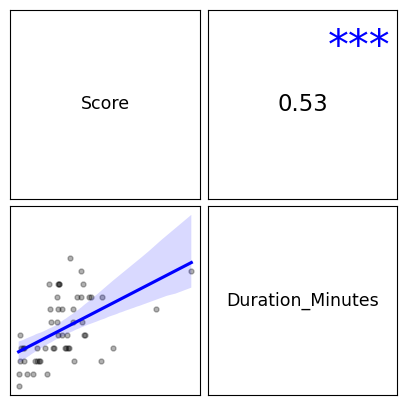

In [21]:
reg.plot("corr")


In [22]:
# # Assuming 'df_filtered' is your DataFrame after applying the necessary transformations.

# # Descriptive statistics for 'Duration_Minutes' and 'Score'
# duration_stats = df_filtered['Duration_Minutes'].describe()
# score_stats = df_filtered['Score'].describe()

# print("Duration_Minutes Stats:\n", duration_stats)
# print("\nScore Stats:\n", score_stats)

# # Distributions of categorical variables
# year_distribution = df_filtered['Year'].value_counts(normalize=True)
# major_distribution = df_filtered['Major'].value_counts(normalize=True)
# gender_distribution = df_filtered['Gender'].value_counts(normalize=True)
# preferred_scale_distribution = df_filtered['Preferred_Scale'].value_counts(normalize=True)
# test_type_distribution = df_filtered['Test_Type'].value_counts(normalize=True)

# print("\nYear Distribution:\n", year_distribution)
# print("\nMajor Distribution:\n", major_distribution)
# print("\nGender Distribution:\n", gender_distribution)
# print("\nPreferred Scale Distribution:\n", preferred_scale_distribution)
# print("\nTest Type Distribution:\n", test_type_distribution)


In [23]:
# import numpy as np
# import pandas as pd

# # Simulating 'Duration_Minutes' within the constraint
# simulated_duration = np.clip(np.random.normal(duration_stats['mean'], duration_stats['std'], 5000), a_min=None, a_max=20)

# # Simulating 'Score' based on its descriptive statistics
# simulated_score = np.random.normal(score_stats['mean'], score_stats['std'], 5000)

# # Function to simulate categorical data based on distribution
# def simulate_categorical(distribution, n=5000):
#     categories = distribution.index
#     probabilities = distribution.values
#     return np.random.choice(categories, size=n, p=probabilities)

# # Simulating categorical variables
# simulated_year = simulate_categorical(year_distribution)
# simulated_major = simulate_categorical(major_distribution)
# simulated_gender = simulate_categorical(gender_distribution)
# simulated_preferred_scale = simulate_categorical(preferred_scale_distribution)
# simulated_test_type = simulate_categorical(test_type_distribution)

# # Creating a DataFrame with simulated data
# df_simulated = pd.DataFrame({
#     'Duration_Minutes': simulated_duration,
#     'Score': simulated_score,
#     'Year': simulated_year,
#     'Major': simulated_major,
#     'Gender': simulated_gender,
#     'Preferred_Scale': simulated_preferred_scale,
#     'Test_Type': simulated_test_type,
# })

# # You can now use df_simulated for further analysis or regression


In [24]:
# # df = pd.read_parquet('df.parquet')
# reg = rsm.model.regress(
#     data=df_simulated,
#     rvar="Score",
#     evar=[
#         "Duration_Minutes",
#         "Year",
#         "Major",
#         "Gender",
#         "Preferred_Scale",
#         "Test_Type",
#     ]
# )
# reg.summary(vif=True)

## Total Tests Taken

In [25]:
# Count the occurrences of 'Relative' and 'Absolute' in the 'Test Type' column
relative_test_count = (df_filtered['Test_Type'] == 'Relative').sum()
absolute_test_count = (df_filtered['Test_Type'] == 'Absolute').sum()

relative_test_count, absolute_test_count


(25, 30)

In [26]:
df_filtered.head()

,Duration_Minutes,Finished,Year,Major,Gender,Preferred_Scale,Email,Score,Test_Type
0,5.216667,NaN,Senior,Business_Economics,Male,Relative scale,rywu@ucsd.edu,4.0,Absolute
1,7.816667,NaN,Junior,Business_Economics,Male,Absolute scale,yuw112@ucsd.edu,7.0,Relative
2,1.616667,NaN,Senior,Business_Economics,Male,Absolute scale,glozanop@ucsd.edu,3.0,Absolute
3,8.100000,NaN,Sophomore,Business_Economics,Female,Relative scale,cic005@ucsd.edu,6.0,Relative
4,3.150000,NaN,Senior,Business_Economics,Male,Relative scale,yux038@ucsd.edu,2.0,Absolute


## Average Score per Test

In [27]:
df_filtered['Score'] = pd.to_numeric(df_filtered['Score'], errors='coerce')

# Calculate the average score for each test type based on the 'Test Type' column
relative_test_avg_score = round(df_filtered[df_filtered['Test_Type'] == 'Relative']['Score'].mean(), 2)
absolute_test_avg_score = round(df_filtered[df_filtered['Test_Type'] == 'Absolute']['Score'].mean(), 2)

print(f"The average score for the 'Relative' test is {relative_test_avg_score}.")
print(f"The average score for the 'Absolute' test is {absolute_test_avg_score}.")


The average score for the 'Relative' test is 5.08.
The average score for the 'Absolute' test is 5.76.


## Average Score per Gender

In [28]:
# Calculate the average score for each gender
male_avg_score = round(df_filtered[df_filtered['Gender'] == 'Male']['Score'].mean(), 2)
female_avg_score = round(df_filtered[df_filtered['Gender'] == 'Female']['Score'].mean(), 2)

print(f"The average score for males is {male_avg_score}.")
print(f"The average score for females is {female_avg_score}.")


The average score for males is 5.37.
The average score for females is 5.86.


## Average Score per Grade

In [29]:
# Calculate the average score for each academic year and round the results
freshman_avg_score = round(df_filtered[df_filtered['Year'] == 'Freshman']['Score'].mean(), 2)
sophomore_avg_score = round(df_filtered[df_filtered['Year'] == 'Sophomore']['Score'].mean(), 2)
junior_avg_score = round(df_filtered[df_filtered['Year'] == 'Junior']['Score'].mean(), 2)
senior_avg_score = round(df_filtered[df_filtered['Year'] == 'Senior']['Score'].mean(), 2)
phd_avg_score = round(df_filtered[df_filtered['Year'] == 'PhD']['Score'].mean(), 2)

# Print the average scores with two decimal places for readability
print(f"The average score for Freshmen is {freshman_avg_score}.")
print(f"The average score for Sophomores is {sophomore_avg_score}.")
print(f"The average score for Juniors is {junior_avg_score}.")
print(f"The average score for Seniors is {senior_avg_score}.")
print(f"The average score for PhD students is {phd_avg_score}.")


The average score for Freshmen is nan.
The average score for Sophomores is 6.0.
The average score for Juniors is 5.76.
The average score for Seniors is 5.13.
The average score for PhD students is 3.0.


## Average Score per Preference

In [30]:
# Calculate the average score for each preferred scale and round the results
relative_scale_avg_score = round(df_filtered[df_filtered['Preferred_Scale'] == 'Relative_scale']['Score'].mean(), 2)
absolute_scale_avg_score = round(df_filtered[df_filtered['Preferred_Scale'] == 'Absolute_scale']['Score'].mean(), 2)

# Print the average scores with two decimal places for readability
print(f"The average score for those who prefer the Relative scale is {relative_scale_avg_score}.")
print(f"The average score for those who prefer the Absolute scale is {absolute_scale_avg_score}.")


The average score for those who prefer the Relative scale is nan.
The average score for those who prefer the Absolute scale is nan.


## Percent of Preferences

In [31]:
# Calculate the percentage of preferences for each scale
preferred_scale_counts = df_filtered['Preferred_Scale'].value_counts(normalize=True) * 100

# Iterate through the percentages and print them with two decimal places
for scale, percentage in preferred_scale_counts.items():
    print(f"{percentage:.2f}% of people prefer the {scale}.")


74.55% of people prefer the Relative scale.
25.45% of people prefer the Absolute scale.


## Average Duration Time

In [32]:
average_duration = df_filtered['Duration_Minutes'].mean()

print(f"The average duration time is {average_duration:.2f} minutes.")


The average duration time is 10.35 minutes.


## Visualizations

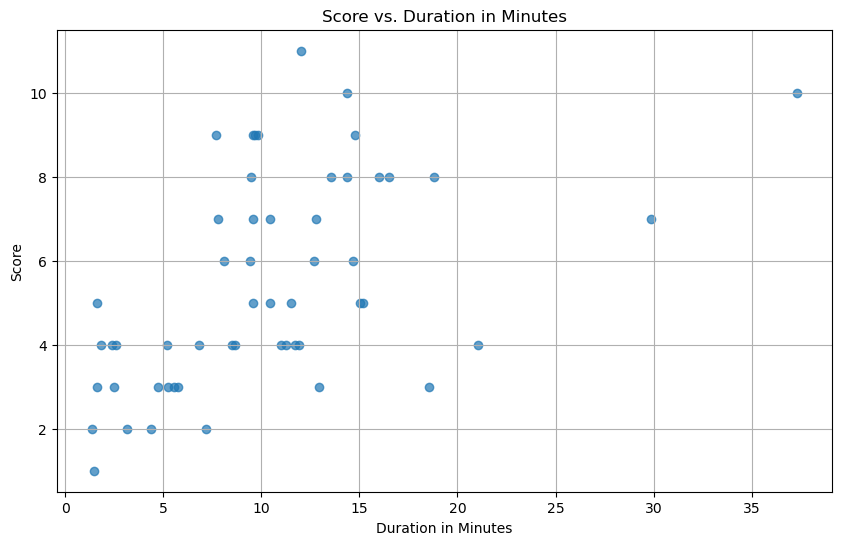

In [33]:
import matplotlib.pyplot as plt

# Assuming 'df_filtered' is your DataFrame that contains the 'Score' and 'Duration_Minutes' columns.

plt.figure(figsize=(10, 6))  # Sets the figure size
plt.scatter(df_filtered['Duration_Minutes'], df_filtered['Score'], alpha=0.7)  # Plots the scatter plot

plt.title('Score vs. Duration in Minutes')  # Sets the title of the plot
plt.xlabel('Duration in Minutes')  # Sets the x-axis label
plt.ylabel('Score')  # Sets the y-axis label
plt.grid(True)  # Adds a grid for better readability

plt.show()  # Displays the plot


Duration has a strong positive correlation with test score that plateaus at around 15 minutes. People who spent longer on the test had higher scores.

/tmp/ipykernel_93662/2136113777.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_score_by_major = df_filtered.groupby('Major')['Score'].mean()


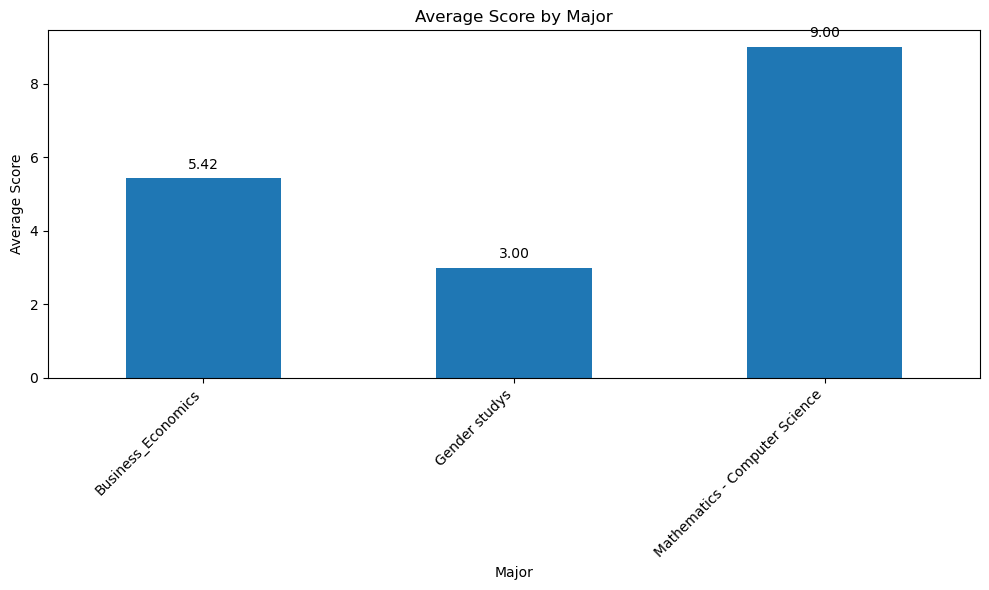

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_filtered is your DataFrame
# Calculate the average score by major
avg_score_by_major = df_filtered.groupby('Major')['Score'].mean()

# Plotting the histogram
plt.figure(figsize=(10, 6))
bars = avg_score_by_major.plot(kind='bar')
plt.title('Average Score by Major')
plt.xlabel('Major')
plt.ylabel('Average Score')
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better readability

# Annotating each bar with its value
for p in bars.patches:
    bars.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', 
                   va = 'center', 
                   xytext = (0, 10), 
                   textcoords = 'offset points')

plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()


Math based majors scored better on average, this makes sense as our test used quantitative questions from past GREs leading to a bias towards individuals with strong quant skills.

/tmp/ipykernel_93662/2181055665.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_score_by_year = df_filtered.groupby('Year')['Score'].mean()


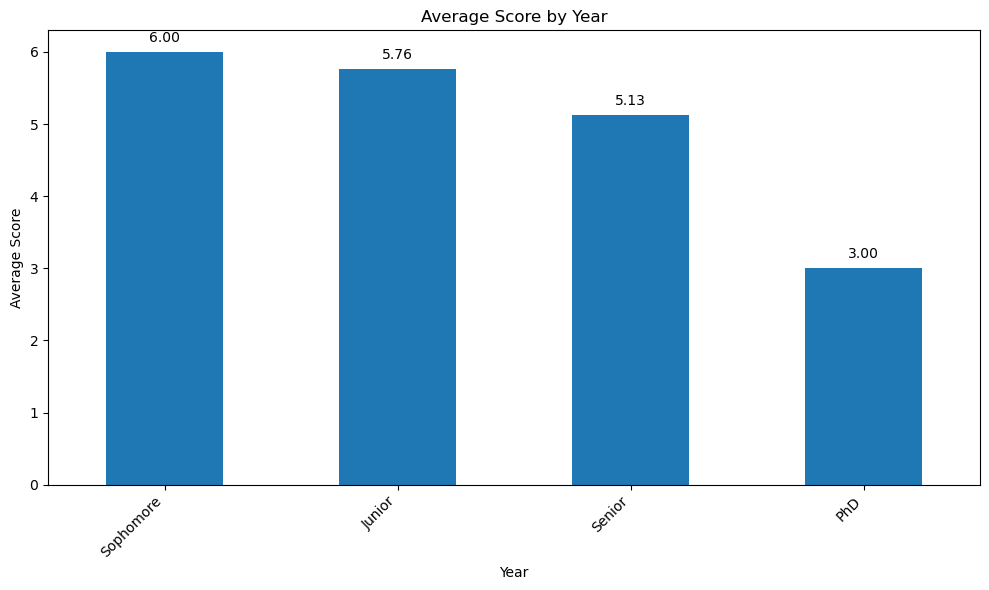

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_filtered is your DataFrame
# Calculate the average score by year
avg_score_by_year = df_filtered.groupby('Year')['Score'].mean()

# Reordering the index according to your specified order
order = ['Sophomore', 'Junior', 'Senior', 'PhD']
avg_score_by_year = avg_score_by_year.reindex(order)

# Plotting the histogram
plt.figure(figsize=(10, 6))
bars = avg_score_by_year.plot(kind='bar')
plt.title('Average Score by Year')
plt.xlabel('Year')
plt.ylabel('Average Score')
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better readability

# Annotating each bar with its value
for p in bars.patches:
    bars.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', 
                   va = 'center', 
                   xytext = (0, 10), 
                   textcoords = 'offset points')

plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()
 

Average score has a negative correlation with the students year (or grad/undergrad in the case of PhD students). This is likely attributed to the GRE testing basic mathematic functions. As an individual progresses through their college career, they begin to specialize more and more on a specific field instead of general mathematics. Students earlier in their career most likely have used general mathematics more frequently than students later in their academic career.

Another possible explanation is motivation, with newer students being more interested in excelling in tasks they deem less important, and older students having a preference to only try on tasks they deem relevant to their personal academic path.

/tmp/ipykernel_93662/1025739185.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_score_by_test_and_scale = df_filtered.groupby(['Test_Type', 'Preferred_Scale'])['Score'].mean().unstack()


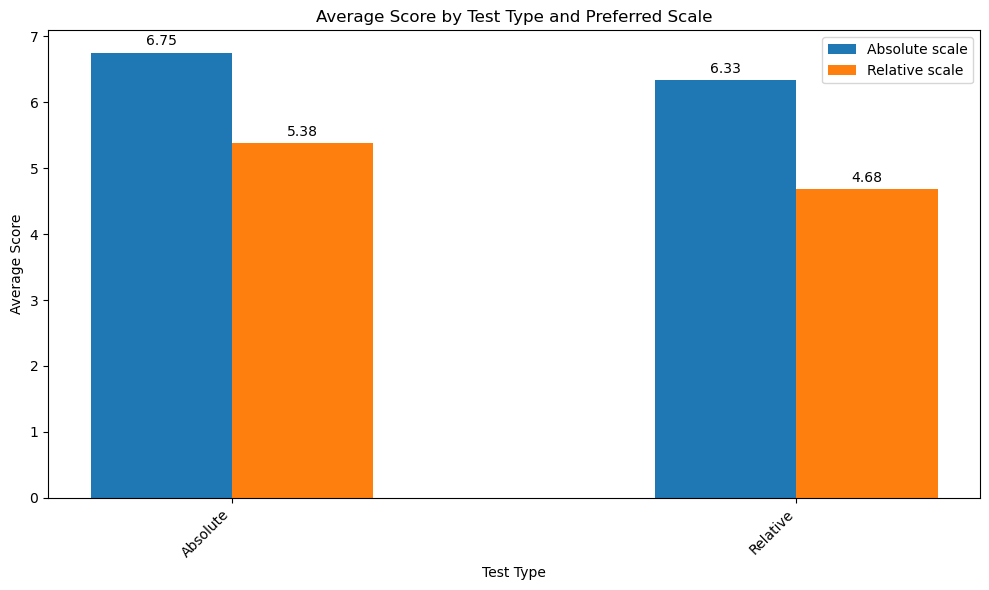

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming df_filtered is your DataFrame
# Calculate the average score by test type and preferred scale
avg_score_by_test_and_scale = df_filtered.groupby(['Test_Type', 'Preferred_Scale'])['Score'].mean().unstack()

# Plotting the grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Setting the positions of the bars on the x-axis
bar_width = 0.25
indices = np.arange(len(avg_score_by_test_and_scale))

# Plotting each group
bars1 = ax.bar(indices - bar_width/2, avg_score_by_test_and_scale.iloc[:, 0], bar_width, label=avg_score_by_test_and_scale.columns[0])
bars2 = ax.bar(indices + bar_width/2, avg_score_by_test_and_scale.iloc[:, 1], bar_width, label=avg_score_by_test_and_scale.columns[1])

# Annotate bars1
for bar in bars1:
    height = bar.get_height()
    ax.annotate('{:.2f}'.format(height),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

# Annotate bars2
for bar in bars2:
    height = bar.get_height()
    ax.annotate('{:.2f}'.format(height),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

# Adding some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Test Type')
ax.set_ylabel('Average Score')
ax.set_title('Average Score by Test Type and Preferred Scale')
ax.set_xticks(indices)
ax.set_xticklabels(avg_score_by_test_and_scale.index)
ax.legend()

# Rotating the tick labels for better readability
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


Users with a preference for absolute test scoring scored noticably better than students with a preference for relative test scores. This is in line with our assumption that students whose grades are based solely off of their own work, rather than in relation to others, will work harder to succeed on their own merits, leading to higher scores.

within both classes of test takers, individuals performed better when told they were being tested on an absolute scale, again most likely due to them not being able to rationalize putting in less effort due to the hope of an eventual curve.

/tmp/ipykernel_93662/3371462268.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  test_preference_by_gender = df_filtered.groupby(['Gender', 'Test_Type']).size().unstack()


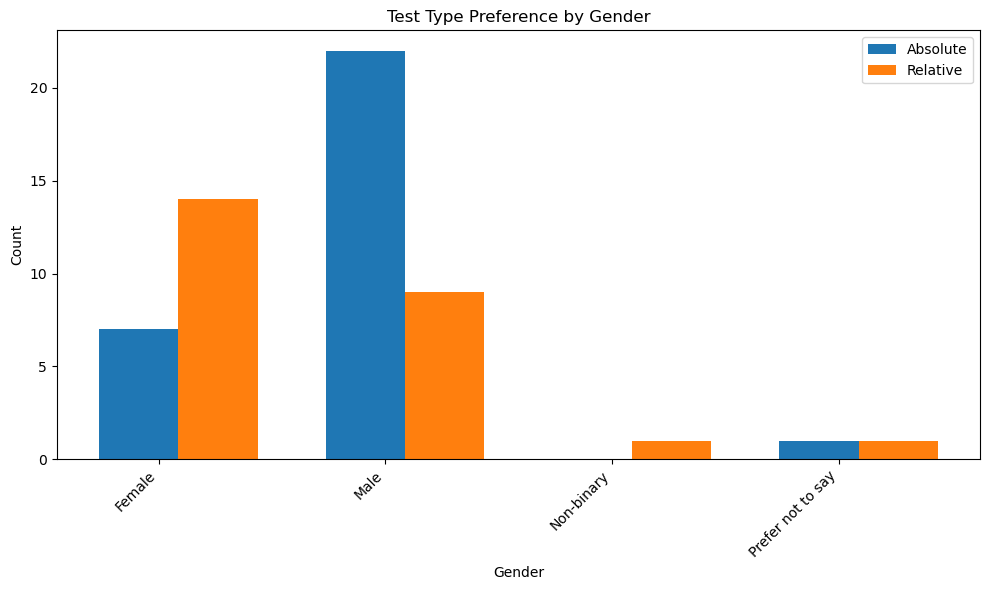

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming df_filtered is your DataFrame
# Count the occurrences of each test type within each gender
test_preference_by_gender = df_filtered.groupby(['Gender', 'Test_Type']).size().unstack()

# Plotting the grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Setting the positions of the bars on the x-axis
bar_width = 0.35
indices = np.arange(len(test_preference_by_gender))

# Plotting each gender group
for i, gender in enumerate(test_preference_by_gender.columns):
    ax.bar(indices + i * bar_width, test_preference_by_gender[gender], bar_width, label=gender)

# Adding some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Gender')
ax.set_ylabel('Count')
ax.set_title('Test Type Preference by Gender')
ax.set_xticks(indices + bar_width / len(test_preference_by_gender.columns) / 2)
ax.set_xticklabels(test_preference_by_gender.index)
ax.legend()

# Rotating the tick labels for better readability
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


Based on our observations, students who identify as male have a strong preference for absolute test scoring, while students who identify as females have a strong preference for relative test scoring. Our data did not have enough observations of students who identify as non-binary to make an assumption of test scoring preferences